## Assignment-18-Forecasting-CocaCola
## Forecast the CocaCola prices and Airlines Passengers data set. 
## Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model.
## Finally which model you will use for Forecasting.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Import Dataset
airlines=pd.read_csv(r"C:\Users\ammaurya\Desktop\Data Science\Assignments\18-Forecasting\Airlines+Data.csv")
airlines

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [43]:
import numpy as np
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
n=airlines['Month'][0]
n[0:3]

'Jan'

In [44]:
airlines['months']=0
airlines['months']

0     0
1     0
2     0
3     0
4     0
     ..
91    0
92    0
93    0
94    0
95    0
Name: months, Length: 96, dtype: int64

In [45]:
for i in range(96):
    n=airlines['Month'][i]
    airlines['months'][i]=n[0:3]
airlines['months']

0     Jan
1     Feb
2     Mar
3     Apr
4     May
     ... 
91    Aug
92    Sep
93    Oct
94    Nov
95    Dec
Name: months, Length: 96, dtype: object

In [46]:
dummy = pd.DataFrame(pd.get_dummies(airlines['months']))
dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
print(dummy.columns)

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')


In [48]:
air=pd.concat((airlines,dummy),axis=1)
t= np.arange(1,97)
air['t']=t
air['t_square']=air['t']*air['t']
air

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025


In [49]:
log_Passengers=np.log(air['Passengers'])
air['log_Passengers']=log_Passengers
air

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:>

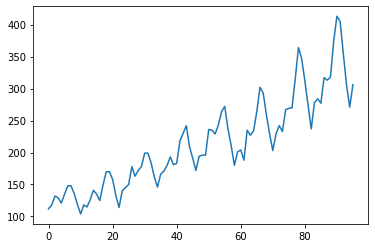

In [50]:
train= air.head(92)
test=air.tail(4)
air.Passengers.plot()

In [51]:
import statsmodels.formula.api as smf

In [52]:
#linear model
linear= smf.ols('Passengers~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

13.834024320700323

In [53]:
#quadratic model
quad=smf.ols('Passengers~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

51.289266550795745

In [54]:
#exponential model
expo=smf.ols('log_Passengers~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

47.528807018553685

In [55]:
#additive seasonality
additive= smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
predadd
rmseadd = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

121.057542397938

In [56]:
#additive seasonality with linear trend
addlinear= smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
predaddlinear
rmseaddlinear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

15.588971216766979

In [57]:
#additive seasonality with quadratic trend
addquad= smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
predaddlinear
rmseaddquad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

20.02636369707501

In [58]:
#multiplicative seasonality
mulsea=smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemul= np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

127.84380162494934

In [59]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

4.854138494897465

In [60]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3.6608650956192723

In [61]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data

{'Model': 0    rmse_mul_quad
 1          rmseadd
 2    rmseaddlinear
 3      rmseaddquad
 4         rmseexpo
 5          rmselin
 6          rmsemul
 7        rmsemulin
 8         rmsequad
 dtype: object,
 'Values': 0      3.660865
 1    121.057542
 2     15.588971
 3     20.026364
 4     47.528807
 5     13.834024
 6    127.843802
 7      4.854138
 8     51.289267
 dtype: float64}

In [62]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,3.660865
1,rmseadd,121.057542
2,rmseaddlinear,15.588971
3,rmseaddquad,20.026364
4,rmseexpo,47.528807
5,rmselin,13.834024
6,rmsemul,127.843802
7,rmsemulin,4.854138
8,rmsequad,51.289267


## Data Driven Models

In [63]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [64]:
airlines_1 = pd.read_csv('Airlines+Data.csv')
airlines_1

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<AxesSubplot:xlabel='Passengers'>

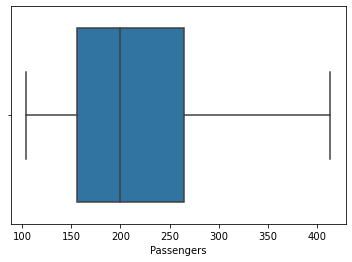

In [65]:
sns.boxplot('Passengers', data=airlines_1)

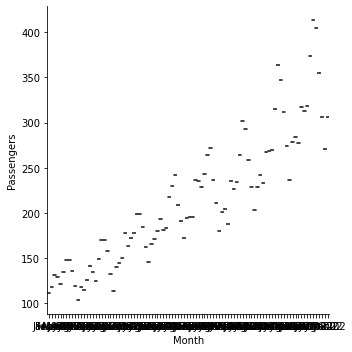

In [66]:
sns.factorplot("Month","Passengers",data=airlines_1,kind="box")

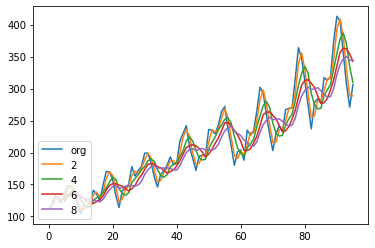

In [67]:
# moving average for the time series to understand better about the trend character in Amtrak
airlines_1.Passengers.plot(label="org")
for i in range(2,10,2):
    airlines_1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

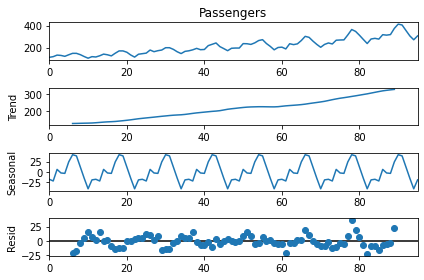

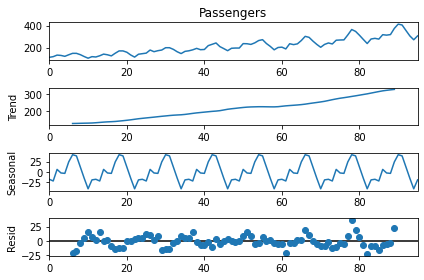

In [68]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(airlines_1.Passengers,period =12)
decompose_ts_add.plot()

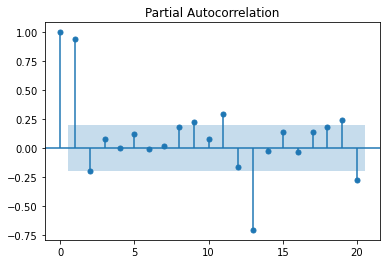

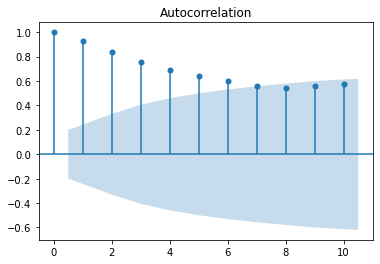

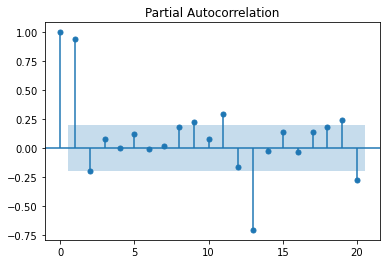

In [69]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(airlines_1.Passengers,lags=10)
tsa_plots.plot_pacf(airlines_1.Passengers)

In [70]:
Train = airlines_1.head(100)
Test = airlines_1.tail(20)

In [71]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [72]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

9.470697707516285

In [73]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

9.525737135381483

In [74]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

9.689815509899962

In [75]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

9.591286191375016

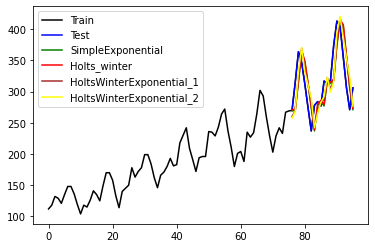

In [76]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')